## Snake or Turtle?

In [ ]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [29]:
#hide
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -U duckduckgo_search
    !pip install fastai
    !pip install fastbook

^C
ERROR: Operation cancelled by user
^C
Traceback (most recent call last):
  File "/opt/conda/bin/pip", line 6, in <module>
    from pip._internal.cli.main import main
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/cli/parser.py", line 12, in <module>
    from pip._internal.configuration import Configuration, ConfigurationError
  File "/opt/conda

UnboundLocalError: local variable 'child' referenced before assignment

In 2015 the idea of creating a computer system that could recognise birds was considered so outrageously challenging that it was the basis of [this XKCD joke](https://xkcd.com/1425/):

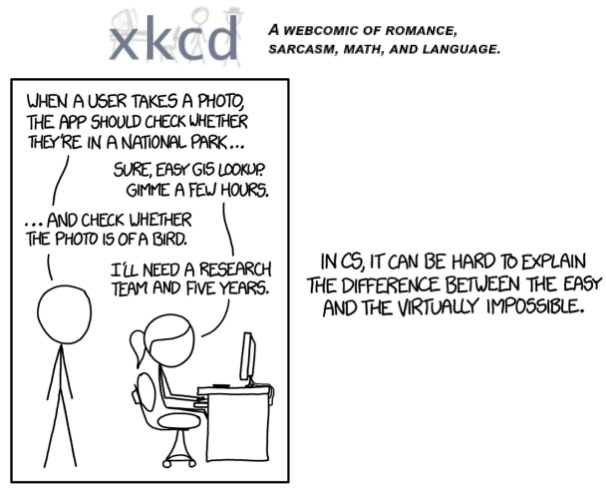

But today, we can do exactly that, in just a few minutes, using entirely free resources!

The basic steps we'll take are:

1. Use DuckDuckGo to search for images of "bird photos"
1. Use DuckDuckGo to search for images of "forest photos"
1. Fine-tune a pretrained neural network to recognise these two groups
1. Try running this model on a picture of a bird and see if it works.

## Step 1: Download images of Snakes and Turtles

In [2]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))


Let's start by searching for a snake photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [12]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('snake photos', max_images=1)
urls[0]

Searching for 'snake photos'


'https://southeastsnakecatcher.com.au/wp-content/uploads/2018/09/South-East-Snake-Catcher-Gold-Coast-Brown-Tree-Snake-1.jpg'

...and then download a URL and take a look at it:

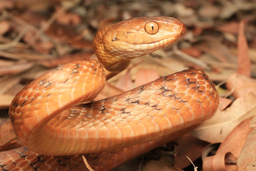

In [14]:
from fastdownload import download_url
dest = 'snake.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "turtle photos":

Searching for 'Turtle photos'


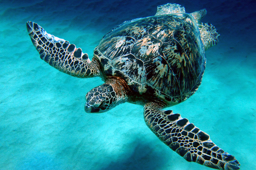

In [15]:
download_url(search_images('Turtle photos', max_images=1)[0], 'turtle.jpg', show_progress=False)
Image.open('turtle.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab a few examples of each of "snake" and "turtle" photos, and save each group of photos to a different folder (I'm also trying to grab a range of lighting conditions here):

In [18]:
searches = 'turtle','snake'
path = Path('snake_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} swimming photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} nature photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'turtle photo'
Searching for 'turtle swimming photo'
Searching for 'turtle nature photo'
Searching for 'snake photo'
Searching for 'snake swimming photo'
Searching for 'snake nature photo'


In [19]:
print(path)
searches = 'turtle','snake'

for imageType in searches:
    print(imageType)
    content = os.listdir(path/imageType)
    for element in content:
        print(element)

snake_or_not
turtle
f6c5da81-88e4-4b66-9e9d-01eafc0fd900.jpg
2d15a6d3-2bc0-4a8d-aac1-b2213a657f4e.jpg
e27046d4-f39a-4240-a272-154e375c8689.jpeg
f5df1bbf-a91b-40ca-a11e-1f03d0b98f2b.jpg
341e520b-19c6-4467-bb91-4cf518fb708a.jpg
de5385e2-43a5-4670-a7d1-a9e45c7e4e0d.jpg
3fd1478c-401f-4814-8767-fc68e2d0ba1d.jpg
0f65b413-85a5-428e-9ed4-fb25bde5c2ce.jpg
8a2ee590-02d8-49c0-96be-c1f2e9bd8bba.jpg
6b8de04b-942c-4440-be0b-d228ab23e5e8.jpg
047988e1-cf48-4af4-83ce-8482e4ba9946.jpg
48474c6b-4cd3-4493-8ef1-c5ac674ab392.jpg
69eef0c5-0bbc-4733-b9fd-bb8be356d657.jpg
56d7b53c-60fc-4f96-86cc-f16f9ee3b6a9.jpg
48418780-4ac2-4136-bff9-436213af2472.jpg
e415f98d-3aa9-4965-96a1-0e502dd4f491.jpg
d211754e-69a6-43ee-8303-2d39fc83ab41.jpg
e1051feb-33e9-4b6c-837c-cbc959a7d051.jpg
a6d418ca-03f0-4071-8474-26f80d4c129c.jpg
28d9cdef-89d5-4766-a777-50d94ee5c4de.jpg
944d0ce9-b9ad-41c3-91fc-f76eaff4ed9e.jpg
a8801326-6318-4b60-9ac3-871b2f091c13.jpg
8031257d-ea9b-42c5-ab61-5f5d81132f0b.jpg
e92f786e-fd96-4322-bbd7-6375d88826cf

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [20]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

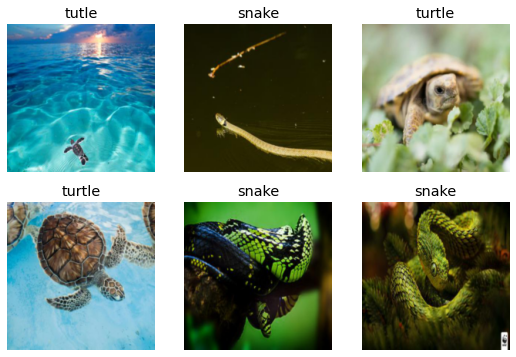

In [21]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [26]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.275808,1.144212,0.447761,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.713562,0.721023,0.268657,00:01
1,0.674119,0.767085,0.298507,00:01
2,0.584963,0.753415,0.253731,00:01
3,0.512673,0.853566,0.253731,00:01
4,0.481938,0.823883,0.253731,00:01


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use our model (and build your own!)

Let's see what our model thinks about that snake we downloaded at the start:

In [27]:
is_bird,_,probs = learn.predict(PILImage.create('snake.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a snake: {probs[0]:.4f}")

This is a: snake.
Probability it's a snake: 0.9582


Good job, resnet18. :)

So, as you see, in the space of a few years, creating computer vision classification models has gone from "so hard it's a joke" to "trivially easy and free"!

It's not just in computer vision. Thanks to deep learning, computers can now do many things which seemed impossible just a few years ago, including [creating amazing artworks](https://openai.com/dall-e-2/), and [explaining jokes](https://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). It's moving so fast that even experts in the field have trouble predicting how it's going to impact society in the coming years.

One thing is clear -- it's important that we all do our best to understand this technology, because otherwise we'll get left behind!

Now it's your turn. Click "Copy & Edit" and try creating your own image classifier using your own image searches!

If you enjoyed this, please consider clicking the "upvote" button in the top-right -- it's very encouraging to us notebook authors to know when people appreciate our work.